# Test 1 Statistics

In [1]:
import os, json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load Files

In [2]:
# importing Test1 .csv file as Dataframe
df_test1= pd.read_csv('Inference_Test1_CLIP-Count.csv', index_col=0)

data_dir = "./data/FSC/FSC_147"
gt_json_filename = "gt_cnts_FSC147.json"
img_class_txt = "ImageClasses_FSC147.txt"
split_classes_file = "Split_Classes_FSC147.json"

# importing GT Counts JSON
with open(os.path.join(data_dir, gt_json_filename), 'r') as file:
    gt_counts_dict = json.load(file)

# importing Image Class .txt   
img_class = {}
    
with open(os.path.join(data_dir, img_class_txt), 'r') as file:
    for line in file:
        line = line.strip().split('\t')
        if len(line) == 2:
            img_name, label = line
            img_id = img_name.split(".")[0]
            img_class[img_id] = label

with open(os.path.join(data_dir, split_classes_file), 'r') as f:
    split_classes = json.load(f)

In [3]:
df_test1.round(1)

,sea shells,hot air balloons,strawberries,stamps,watches,apples,comic books,sheep,markers,keyboard keys,...,candy pieces,marbles,potato chips,skis,tree logs,eggs,sauce bottles,sticky notes,nail polish,legos
2.jpg,12.7,13.1,13.7,13.7,13.7,13.7,12.5,13.7,13.7,13.1,...,12.4,13.7,14.0,13.7,13.2,13.7,12.2,12.7,12.1,13.7
3.jpg,13.7,14.4,14.7,14.7,14.7,14.7,13.7,14.7,14.7,15.5,...,13.2,14.7,14.1,14.7,15.4,14.7,13.3,14.1,12.6,14.7
4.jpg,12.5,12.9,13.1,13.1,13.1,13.1,12.1,13.1,13.1,14.1,...,12.0,13.1,12.8,13.1,14.4,13.1,11.7,12.7,11.0,13.1
5.jpg,84.8,86.6,86.3,86.3,86.3,86.3,84.0,86.3,86.3,89.2,...,84.8,86.3,87.0,86.3,88.8,86.3,81.8,84.9,79.6,86.3
6.jpg,10.2,12.0,12.8,12.8,12.8,12.8,10.7,12.8,12.8,12.6,...,10.1,12.8,11.5,12.8,13.2,12.8,9.4,10.5,8.6,12.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6918.jpg,111.9,112.1,115.1,115.1,115.1,115.1,108.4,115.1,115.1,113.5,...,106.2,115.1,112.8,115.1,116.3,115.1,105.8,110.6,105.4,115.1
7500.jpg,170.2,179.6,181.1,181.1,181.1,181.1,173.8,181.1,181.1,183.9,...,170.0,181.1,180.1,181.1,182.2,181.1,164.9,173.4,153.5,181.1
7047.jpg,52.7,55.6,55.2,55.2,55.2,55.2,54.1,55.2,55.2,58.4,...,53.6,55.2,56.0,55.2,56.6,55.2,52.9,53.3,49.4,55.2
7412.jpg,20.8,24.8,25.7,25.7,25.7,25.7,21.9,25.7,25.7,26.0,...,20.7,25.7,25.8,25.7,27.2,25.7,19.8,22.0,16.6,25.7


### Evaluate Statistics

In [4]:
PRECISION = 2
gt_counts = list(gt_counts_dict.values())

positive_preds = {}
pos_classes = {}
max_neg_classes = {}

# extracting the positive predictions and their classes
for img_filename in gt_counts_dict.keys():
    class_name = img_class[img_filename.split('.')[0]]
    
    positive_preds[img_filename] = df_test1.loc[img_filename][class_name]
    df_test1.loc[img_filename][class_name] = np.nan
    pos_classes[img_filename.split('.')[0]] = class_name
    
max_negs = round(df_test1.max(axis=1), PRECISION)
max_neg_classes = df_test1.idxmax(axis=1)
neg_pred_count_means = df_test1.mean(axis=1)

positive_preds = [np.round(x, PRECISION) for x in list(positive_preds.values())]
negative_preds_mean = neg_pred_count_means.values.round(PRECISION)

# ensure all lists/arrays have the same length as df_test1.index
assert len(positive_preds) == len(df_test1.index)
assert len(negative_preds_mean) == len(df_test1.index)
assert len(gt_counts) == len(df_test1.index)

aggregation_df = pd.DataFrame(data={
    'Image Name': df_test1.index,
    'Positive Class': list(pos_classes.values()),
    'GT Count': gt_counts,
    'Positive Pred': positive_preds,
    'Mean Negative Pred': negative_preds_mean,
    'Max Neg Class': max_neg_classes,
    'Max Neg Pred': max_negs,
    'Positive-Negative Gap': abs(np.array(positive_preds) - negative_preds_mean),
    "Positive-GT Gap": abs(np.array(gt_counts) - np.array(positive_preds)),
    "Negative-GT Gap": abs(np.array(gt_counts) - np.array(negative_preds_mean))
})

aggregation_df.reset_index(drop=True, inplace=True)

In [5]:
#df_test1
#positive_preds

In [6]:
aggregation_df_head = aggregation_df.head(10)
aggregation_df

,Image Name,Positive Class,GT Count,Positive Pred,Mean Negative Pred,Max Neg Class,Max Neg Pred,Positive-Negative Gap,Positive-GT Gap,Negative-GT Gap
0,2.jpg,sea shells,8,12.66,13.13,potato chips,13.99,0.47,4.66,5.13
1,3.jpg,hot air balloons,11,14.36,14.23,keyboard keys,15.47,0.13,3.36,3.23
2,4.jpg,hot air balloons,10,12.91,12.75,tree logs,14.36,0.16,2.91,2.75
3,5.jpg,hot air balloons,113,86.62,85.39,keyboard keys,89.25,1.23,26.38,27.61
4,6.jpg,hot air balloons,9,11.98,11.50,tree logs,13.17,0.48,2.98,2.50
...,...,...,...,...,...,...,...,...,...,...
1185,6918.jpg,nail polish,87,105.38,112.29,tree logs,116.31,6.91,18.38,25.29
1186,7500.jpg,sheep,181,181.12,175.65,keyboard keys,183.88,5.47,0.12,5.35
1187,7047.jpg,sheep,54,55.25,54.45,keyboard keys,58.44,0.80,1.25,0.45
1188,7412.jpg,sheep,36,25.73,23.63,tree logs,27.19,2.10,10.27,12.37


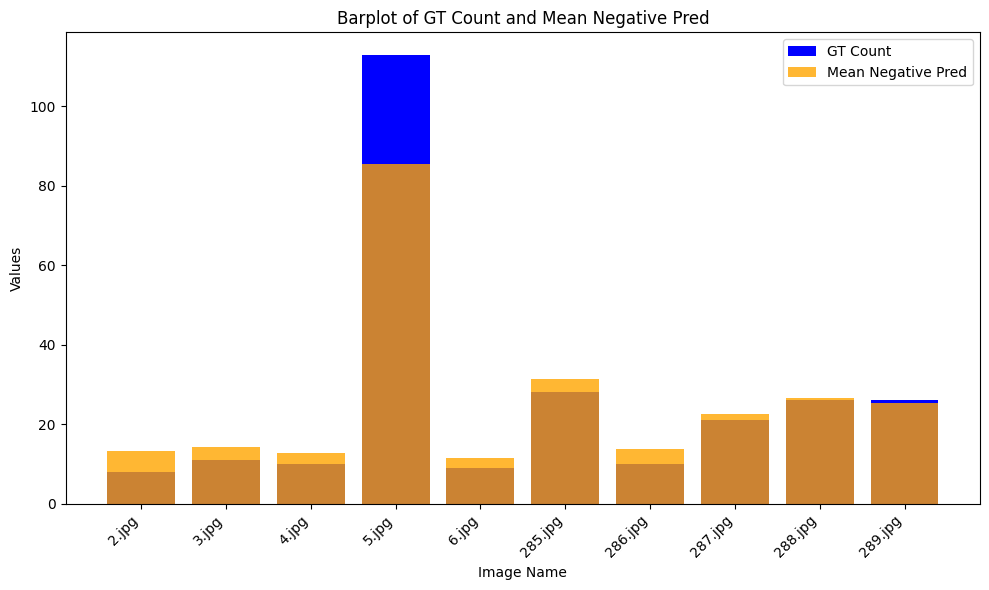

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(aggregation_df_head['Image Name'], aggregation_df_head['GT Count'], color='blue', label='GT Count')
plt.bar(aggregation_df_head['Image Name'], aggregation_df_head['Mean Negative Pred'], color='orange', label='Mean Negative Pred', alpha=0.8)
plt.xlabel('Image Name')
plt.ylabel('Values')
plt.title('Barplot of GT Count and Mean Negative Pred')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

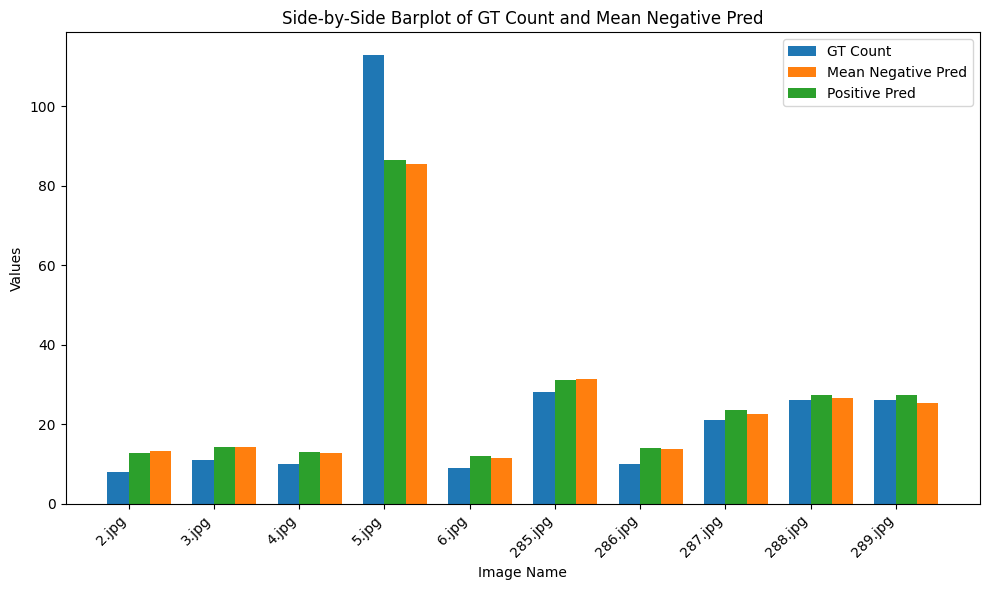

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = aggregation_df_head.index

plt.bar(index, aggregation_df_head['GT Count'], bar_width, label='GT Count')
plt.bar(index + bar_width * 2, aggregation_df_head['Mean Negative Pred'], bar_width, label='Mean Negative Pred')
plt.bar(index + bar_width, aggregation_df_head['Positive Pred'], bar_width, label='Positive Pred')

plt.xlabel('Image Name')
plt.ylabel('Values')
plt.title('Side-by-Side Barplot of GT Count and Mean Negative Pred')
plt.xticks(index + bar_width / 2, aggregation_df_head['Image Name'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# select rows with 0.0 as Positive Prediction
#aggregation_df[aggregation_df["Positive Pred"] < 1.0 ]

# filter the dataframe excluding Positive Pred == 0.0
#aggregation_df = aggregation_df[aggregation_df["Positive Pred"] > 0.0 ]
len(aggregation_df)

1190

In [10]:
METRIC_PRECISION = 3

# Evaluate Pred Normalized Mean
aggregation_df["Positive Pred Normalized by GT"] = aggregation_df["Positive Pred"] / aggregation_df["GT Count"]
aggregation_df["Mean Negative Pred Normalized by GT"] = aggregation_df["Mean Negative Pred"] / aggregation_df["GT Count"]

pos_pred_normalized_mean = round(aggregation_df["Positive Pred Normalized by GT"].mean(), METRIC_PRECISION)
neg_pred_normalized_mean = round(aggregation_df["Mean Negative Pred Normalized by GT"].mean(), METRIC_PRECISION)
print(f"Positive Pred Normalized by GT: {pos_pred_normalized_mean}")
print(f"Mean Negative Pred Normalized by GT: {neg_pred_normalized_mean}")

aggregation_df["Mean Negative Pred Normalized by Pos Pred"] = aggregation_df["Mean Negative Pred"] / aggregation_df["Positive Pred"]
neg_pred_normalized_mean_by_pos = round(aggregation_df["Mean Negative Pred Normalized by Pos Pred"].mean(), METRIC_PRECISION)
print(f"Mean Negative Pred Normalized by Pos Pred: {neg_pred_normalized_mean_by_pos}")

Positive Pred Normalized by GT: 1.312
Mean Negative Pred Normalized by GT: 1.298
Mean Negative Pred Normalized by Pos Pred: 0.994


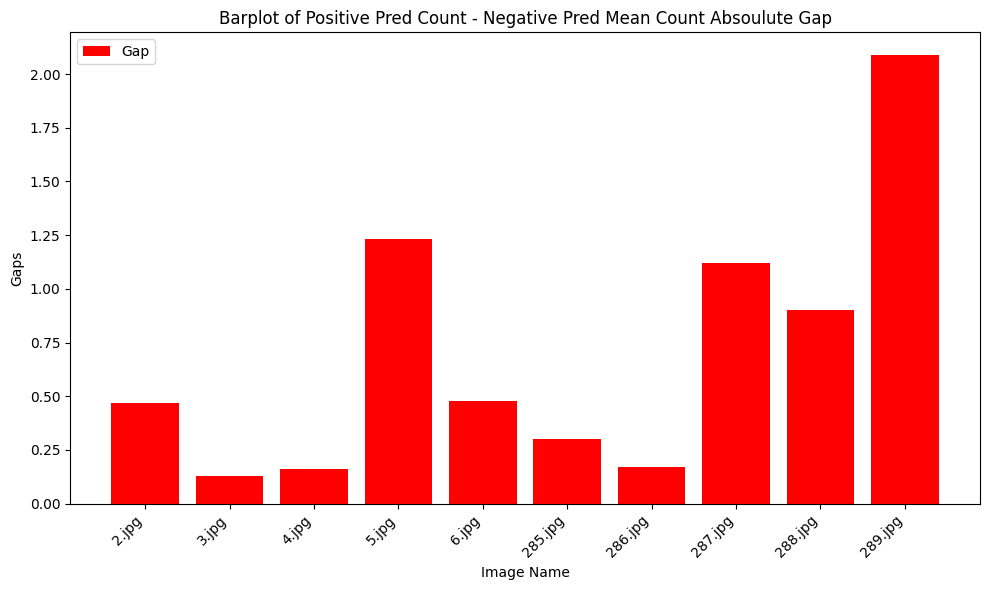

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(aggregation_df_head['Image Name'], aggregation_df_head['Positive-Negative Gap'], color='red', label='Gap')
plt.xlabel('Image Name')
plt.ylabel('Gaps')
plt.title('Barplot of Positive Pred Count - Negative Pred Mean Count Absoulute Gap')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
bad_preds = len(aggregation_df[aggregation_df['Positive-GT Gap'] > aggregation_df['Negative-GT Gap']])
all_preds = len(aggregation_df)
bad_prediction_rate = round((bad_preds/all_preds)*100, 2)

print(f"Percentage of query iamges where Positive-GT Gap is higher than Negative-GT Gap: {bad_prediction_rate}%")

Percentage of query iamges where Positive-GT Gap is higher than Negative-GT Gap: 61.93%


In [13]:
# define statistics data
statistics_data = {
    'Model': ['CLIP-Count'],
    'AvgNP': [pos_pred_normalized_mean],
    'AvgNMN': [neg_pred_normalized_mean],
    #'Negative Prediction Normalized by Pos Pred': [neg_pred_normalized_mean_by_pos],
    'WPR': [bad_prediction_rate],
}
df_statistics = pd.DataFrame(statistics_data)

# path to the global CSV file
global_csv_path = '../Test1_models_metrics.csv'

# read the global CSV file if it exists, otherwise create an empty DataFrame
if os.path.exists(global_csv_path):
    df_global = pd.read_csv(global_csv_path)
else:
    df_global = pd.DataFrame()

# append the new statistics DataFrame to the global DataFrame and save
df_global = pd.concat([df_global, df_statistics], ignore_index=True)
df_global.to_csv(global_csv_path, index=False)